## JPEG圧縮（step.1）離散コサイン変換

True

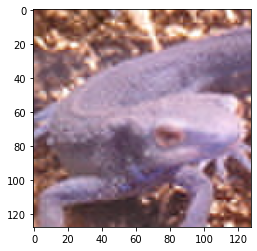

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DCT hypor parameter
T = 8
K = 4  # 落としたら画質荒くなった
channel = 3

#DCT weight
def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi / (2*T)
    return ((2*cu*cv/T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

# DCT
def dct(img):
    H, W, _ = img.shape
    
    F = np.zeros((H, W, channel), dtype=np.float32)
    
    for c in range(channel):
        for yi in range(0, H, T):  # 0, 8, 16, ...
            for xi in range(0, W, T):
                for v in range(T):
                    for u in range(T):
                        for y in range(T):
                            for x in range(T):
                                F[v+yi, u+xi, c] += img[y+yi, x+xi, c]*w(x, y, u, v)
                                # u, v : F由来　　　x, y : input由来
    return F


#IDCT
def idct(F):
    H, W, _ = F.shape

    out = np.zeros((H, W, channel), dtype=np.float32)
    
    for c in range(channel):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for y in range(T):
                    for x in range(T):
                        for v in range(K):
                            for u in range(K):
                                out[y+yi, x+xi, c] += F[v+yi, u+xi, c]*w(x, y, u, v)
                                
    # 画像に復元するから整形する
    out = np.clip(out, 0, 255)
    out = np.round(out).astype(np.uint8)
                
    return out

img = cv2.imread('../imori.jpg').astype(np.float32)

#DCT
F = dct(img)

# IDCT
out = idct(F)

# imshow
plt.imshow(out)

# imwrite
cv2.imwrite('out36.jpg', out)